# Proyecto Integrador de Clustering

Aplicar K-Means y DBSCAN, comparar resultados con métricas internas y externas, y analizar ventajas y limitaciones de cada enfoque.

## Teoria
- El dataset "Digits":
    - Tiene 10 clases (0-9).
    - Features = intensidad de pixeles en 8x8 imágenes.
    - Más ruido y solapamiento entre clases -> clustering se vuelve más desafiante.
- Objetivo:
    - Ver cómo K-Means y DBSCAN agrupan los dígitos.
    - Evaluar con métricas internas (Silhouette, Davies-Bouldin) y externas (ARI, AMI, Homogeneity, Completeness) para comparar con etiquetas verdaderas.

Shape X: (1797, 64)
Shape y: (1797,)


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


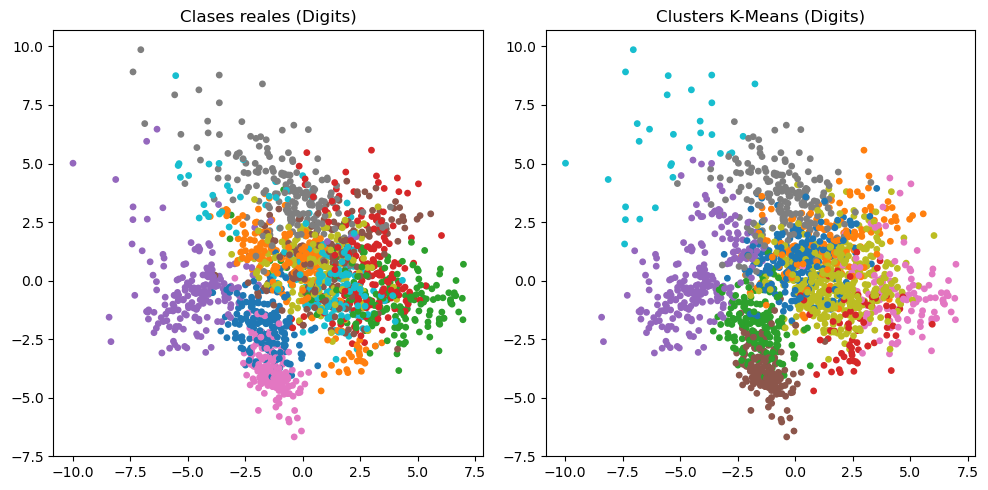

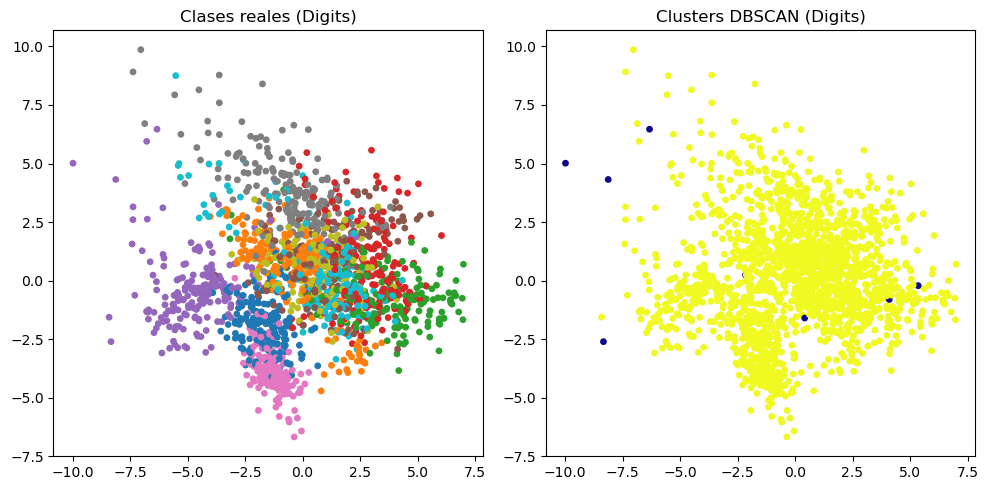


=== K-Means ===
Silhouette: 0.139, Davies-Bouldin: 1.877
ARI=0.534, AMI=0.668, Hom=0.650, Comp=0.694, V=0.671

=== DBSCAN ===
Silhouette/Davies-Bouldin no válidos (todo -1 o un solo cluster)
ARI=0.000, AMI=0.002, Hom=0.002, Comp=0.153, V=0.005


In [2]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import (
    silhouette_score, davies_bouldin_score,
    adjusted_rand_score, adjusted_mutual_info_score,
    homogeneity_completeness_v_measure
)
import matplotlib.pyplot as plt

# 1. Cargar dataset
digits = load_digits()
X, y = digits.data, digits.target

print("Shape X:", X.shape)   # (1797, 64)
print("Shape y:", y.shape)   # (1797,)

# 2. Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Reducir a 2D con PCA para graficar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# ================================
# K-MEANS
# ================================
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="tab10", s=15)
plt.title("Clases reales (Digits)")
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_kmeans, cmap="tab10", s=15)
plt.title("Clusters K-Means (Digits)")
plt.tight_layout()
plt.show()

# ================================
# DBSCAN
# ================================
dbscan = DBSCAN(eps=15, min_samples=5)  # valores ajustados para este dataset
y_dbscan = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="tab10", s=15)
plt.title("Clases reales (Digits)")
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_dbscan, cmap="plasma", s=15)
plt.title("Clusters DBSCAN (Digits)")
plt.tight_layout()
plt.show()

# ================================
# Métricas
# ================================
def evaluar(nombre, y_pred):
    print(f"\n=== {nombre} ===")
    # Internas
    if len(set(y_pred)) > 1 and -1 not in set(y_pred):
        sil = silhouette_score(X_scaled, y_pred)
        db = davies_bouldin_score(X_scaled, y_pred)
        print(f"Silhouette: {sil:.3f}, Davies-Bouldin: {db:.3f}")
    else:
        print("Silhouette/Davies-Bouldin no válidos (todo -1 o un solo cluster)")

    # Externas
    ari = adjusted_rand_score(y, y_pred)
    ami = adjusted_mutual_info_score(y, y_pred)
    h, c, v = homogeneity_completeness_v_measure(y, y_pred)
    print(f"ARI={ari:.3f}, AMI={ami:.3f}, Hom={h:.3f}, Comp={c:.3f}, V={v:.3f}")

evaluar("K-Means", y_kmeans)
evaluar("DBSCAN", y_dbscan)


## Resultados
- K-Means:
    - Forzará 10 clusters. 
    - No coincide perfecto con las clases reales (algunos 3 y 8 suelen mezclarse).
    - Silhouette suele ser bajo (~0.1-0.2), lo que indica clusters solapados.
    - ARI/AMI dan una idea de similitud con las etiquetas verdaderas.
- DBSCAN:
    - No necesita K.
    - Puede arcar muchos puntos como ruido (-1).
    - A veces encuentra menos de 10 clusters.
    - Sensible a `eps`: con valores pequeños, muchos outliers con granfes, pocos clusters.


## Tarea
1. Ejecuta el código.
2. Ajusta `eps` en DBSCAN (ej. 5, 10, 20).
    - ¿Cuántos clusters encuentras en cada caso?
    - ¿Cuántos outliers (`-1`)?
3. Compara métricas de K-Means vs DBSCAN:
    - ¿Cuál tiene mejor Silhouette?
    - ¿Cuál se acerca más a las clases reales (ARI/AMI)?

Shape X: (1797, 64)
Shape y: (1797,)


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


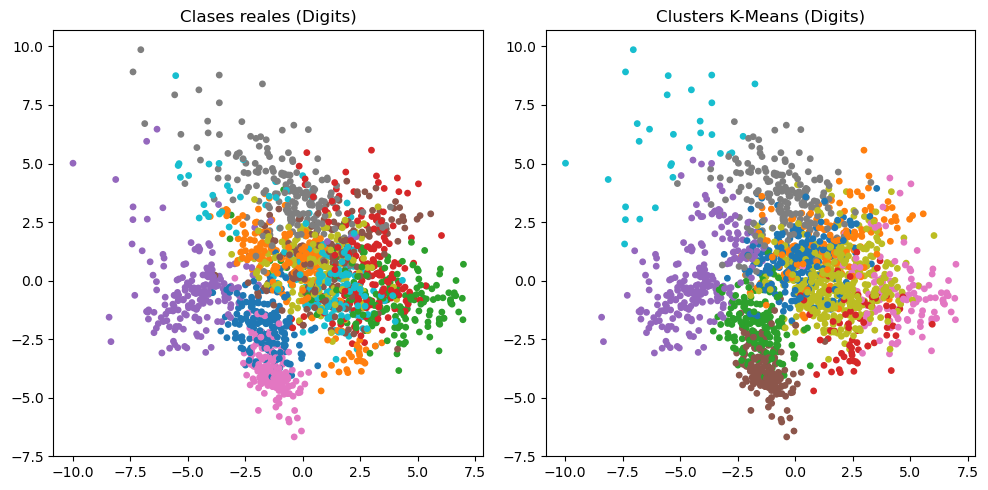

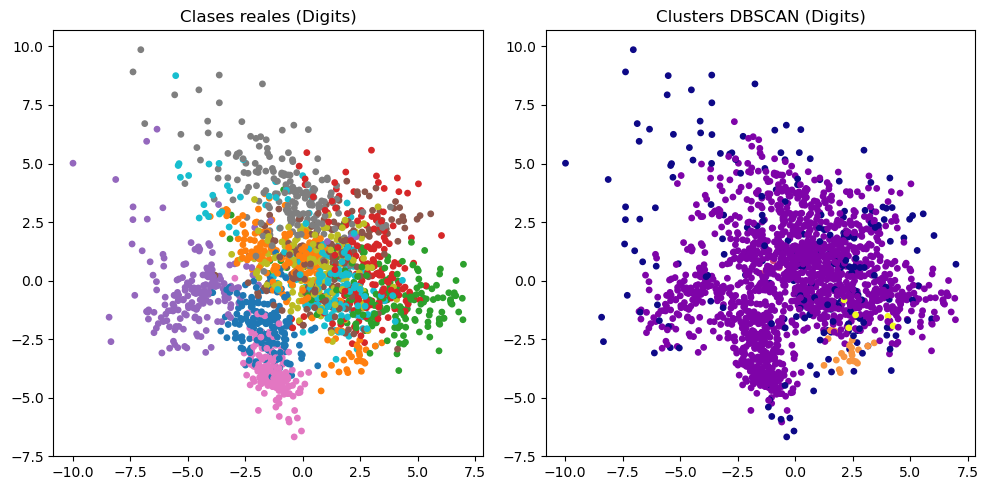


=== K-Means ===
Silhouette: 0.139, Davies-Bouldin: 1.877
ARI=0.534, AMI=0.668, Hom=0.650, Comp=0.694, V=0.671

=== DBSCAN ===
Silhouette/Davies-Bouldin no válidos (todo -1 o un solo cluster)
ARI=0.002, AMI=0.040, Hom=0.028, Comp=0.142, V=0.047

eps=5
Clusters encontrados: 4
Outliers: 207
Silhouette: -0.009

eps=10
Clusters encontrados: 1
Outliers: 17
Silhouette no válido (1 cluster o todo ruido)

eps=20
Clusters encontrados: 1
Outliers: 7
Silhouette no válido (1 cluster o todo ruido)


In [6]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import (
    silhouette_score, davies_bouldin_score,
    adjusted_rand_score, adjusted_mutual_info_score,
    homogeneity_completeness_v_measure
)
import matplotlib.pyplot as plt
import numpy as np

# 1. Cargar dataset
digits = load_digits()
X, y = digits.data, digits.target

print("Shape X:", X.shape)   # (1797, 64)
print("Shape y:", y.shape)   # (1797,)

# 2. Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Reducir a 2D con PCA para graficar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# ================================
# K-MEANS
# ================================
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="tab10", s=15)
plt.title("Clases reales (Digits)")
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_kmeans, cmap="tab10", s=15)
plt.title("Clusters K-Means (Digits)")
plt.tight_layout()
plt.show()

# ================================
# DBSCAN
# ================================
dbscan = DBSCAN(eps=5, min_samples=5)  # valores ajustados para este dataset
y_dbscan = dbscan.fit_predict(X_scaled)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="tab10", s=15)
plt.title("Clases reales (Digits)")
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_dbscan, cmap="plasma", s=15)
plt.title("Clusters DBSCAN (Digits)")
plt.tight_layout()
plt.show()

# ================================
# Métricas
# ================================
def evaluar(nombre, y_pred):
    print(f"\n=== {nombre} ===")
    # Internas
    if len(set(y_pred)) > 1 and -1 not in set(y_pred):
        sil = silhouette_score(X_scaled, y_pred)
        db = davies_bouldin_score(X_scaled, y_pred)
        print(f"Silhouette: {sil:.3f}, Davies-Bouldin: {db:.3f}")
    else:
        print("Silhouette/Davies-Bouldin no válidos (todo -1 o un solo cluster)")

    # Externas
    ari = adjusted_rand_score(y, y_pred)
    ami = adjusted_mutual_info_score(y, y_pred)
    h, c, v = homogeneity_completeness_v_measure(y, y_pred)
    print(f"ARI={ari:.3f}, AMI={ami:.3f}, Hom={h:.3f}, Comp={c:.3f}, V={v:.3f}")

evaluar("K-Means", y_kmeans)
evaluar("DBSCAN", y_dbscan)

for eps in [5, 10, 20]:
    db = DBSCAN(eps=eps, min_samples=5).fit(X_scaled)
    y_db = db.labels_
    n_clusters = len(set(y_db)) - (1 if -1 in y_db else 0)
    n_outliers = np.sum(y_db == -1)
    
    print(f"\neps={eps}")
    print(f"Clusters encontrados: {n_clusters}")
    print(f"Outliers: {n_outliers}")
    
    if n_clusters > 1:
        sil = silhouette_score(X_scaled, y_db)
        print(f"Silhouette: {sil:.3f}")
    else:
        print("Silhouette no válido (1 cluster o todo ruido)")
